In [1]:
import pandas as pd
from tqdm import tqdm
import os

In [ ]:
seq_id_accessions = pd.read_parquet('../data/interim/seq_id_accessions.pq')

In [ ]:
defense_finder_top_folders = []
for i in range(18):
    defense_finder_top_folders.append('defense_finder_results_' + str(i))

In [ ]:
defense_finder_top_folders

In [ ]:
defense_finder_genes_list = []
defense_finder_hmmer_list = []
for top_folder in defense_finder_top_folders:
    top_folder_path = '../data/interim/' + top_folder + '/'
    subfolders = os.listdir(top_folder_path)
    for folder in tqdm(subfolders):
        folder_path = top_folder_path + folder + '/'
        defense_finder_genes = pd.read_table(folder_path + 'defense_finder_genes.tsv')
        defense_finder_genes['genome'] = folder
        defense_finder_genes_list.append(defense_finder_genes)
        defense_finder_hmmers = pd.read_table(folder_path + 'defense_finder_hmmer.tsv')
        defense_finder_hmmers['genome'] = folder
        defense_finder_hmmer_list.append(defense_finder_hmmers)

In [ ]:
defense_finder_hmmer_df = pd.concat(defense_finder_hmmer_list)
defense_finder_genes_df = pd.concat(defense_finder_genes_list)

In [ ]:
(defense_finder_genes_df
 .groupby('gene_name')
 .agg(unique_genomes=('genome', 'nunique'), 
      unique_proteins=('hit_id', 'nunique'))
 .sort_values('unique_genomes', ascending=False)
 .head(50))

In [ ]:
unqique_true_defense_ids = defense_finder_genes_df['hit_id'].drop_duplicates()
true_defense_seq_id_accessions = seq_id_accessions[seq_id_accessions['protein_accession']
                                                   .isin(unqique_true_defense_ids)]
true_defense_seq_ids = true_defense_seq_id_accessions['seq_id'].drop_duplicates()
len(true_defense_seq_ids)

In [ ]:
merged_defense_finder_genes_df = (defense_finder_genes_df
                                  .rename(columns={'hit_id': 'protein_accession'})
                                  .merge(true_defense_seq_id_accessions, 
                                         how='inner', on='protein_accession'))

In [ ]:
unique_defense_homolog_accessions = defense_finder_hmmer_df['hit_id'].drop_duplicates() # to remove from control set
defense_homolog_seq_id_accessions = seq_id_accessions[seq_id_accessions['protein_accession']
                                                   .isin(unique_defense_homolog_accessions)]
defense_homolog_seq_ids = defense_homolog_seq_id_accessions['seq_id'].drop_duplicates()
len(defense_homolog_seq_ids)

In [ ]:
defense_homolog_df = (defense_finder_hmmer_df[['hit_id', 'gene_name']]
                      .drop_duplicates()
                      .rename(columns={'hit_id': 'protein_accession'})
                      .merge(defense_homolog_seq_id_accessions, how='inner', 
                             on='protein_accession')
                      .drop(columns='protein_accession'))

In [ ]:
merged_defense_finder_genes_df.to_parquet('../data/interim/defense_finder_genes_genomes.pq', 
                                          index=False)
true_defense_seq_ids.to_frame().to_parquet('../data/interim/defense_finder_true_defense_seq_ids.pq',
                                           index=False)
defense_homolog_seq_ids.to_frame().to_parquet('../data/interim/defense_finder_homologs_seq_ids.pq',
                                              index=False)
defense_homolog_df.to_parquet('../data/interim/defense_finder_homologs_profile_names.pq', 
                              index=False)

In [2]:
defense_finder_genes_genomes = pd.read_parquet('../data/interim/defense_finder_genes_genomes.pq')

In [3]:
len(defense_finder_genes_genomes)

244022

In [5]:
defense_finder_genes_genomes['gene_name'].nunique()

971

In [6]:
gene_counts = defense_finder_genes_genomes['gene_name'].value_counts()

<Axes: >

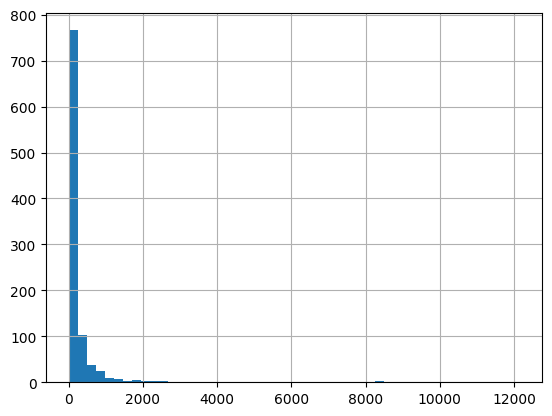

In [7]:
gene_counts.hist(bins=50)

In [8]:
gene_counts.median()

51.0

In [9]:
gene_counts.mean()

251.30998970133882

In [4]:
defense_finder_genes_genomes

,replicon,protein_accession,gene_name,hit_pos,model_fqn,sys_id,sys_loci,locus_num,sys_wholeness,sys_score,...,hit_i_eval,hit_score,hit_profile_cov,hit_seq_cov,hit_begin_match,hit_end_match,counterpart,used_in,genome,seq_id
0,UserReplicon,WP_104808176.1,CBASS__Phospholipase,136,defense-finder-models/DefenseFinder_5/CBASS/CB...,UserReplicon_CBASS_I_3,1,1,1.0,2.0,...,6.100000e-90,299.4,0.921,0.982,3,334,None,UserReplicon_CBASS_1,GCF_002943715,509511e1c80ca9d983895d3a6978bfaaae22029103f259...
1,UserReplicon,WP_104808177.1,CBASS__Cyclase_II,137,defense-finder-models/DefenseFinder_5/CBASS/CB...,UserReplicon_CBASS_I_3,1,1,1.0,2.0,...,1.200000e-39,134.0,0.876,0.694,12,358,None,UserReplicon_CBASS_1,GCF_002943715,0ac4c3b9a40e0c8d49bd88e69f7ce8a4f394e7e401b2eb...
2,UserReplicon,WP_104809476.1,CBASS__Endonuc_small,1266,defense-finder-models/DefenseFinder_5/CBASS/CB...,UserReplicon_CBASS_I_4,1,1,1.0,2.0,...,9.600000e-12,42.7,0.780,0.709,6,202,None,UserReplicon_CBASS_2,GCF_002943715,79d43c4bfdc055ce1fa1dc4f99d8d49f592965d5765c4b...
3,UserReplicon,WP_104809477.1,CBASS__Cyclase_II,1267,defense-finder-models/DefenseFinder_5/CBASS/CB...,UserReplicon_CBASS_I_4,1,1,1.0,2.0,...,1.700000e-11,41.5,0.920,0.985,4,326,None,UserReplicon_CBASS_2,GCF_002943715,817c3f75e870ce99cdcdce9cdeb4d3a559bf4cc4c710b5...
4,UserReplicon,WP_104810012.1,SoFic__SoFic,1738,defense-finder-models/DefenseFinder_5/SoFIC/SoFic,UserReplicon_SoFic_5,1,1,1.0,1.0,...,2.300000e-114,380.1,0.972,0.961,12,358,None,None,GCF_002943715,017a737124a375f1ce0662310a3202d7a75d5c6d38f0e4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244017,UserReplicon,WP_018971422.1,Eleos__LeoA,160,defense-finder-models/DefenseFinder_5/Eleos/Eleos,UserReplicon_Eleos_1,1,1,0.5,2.0,...,2.800000e-17,60.5,0.388,0.478,35,251,None,None,GCF_000378125,b6bfc769aec4184ace05bc47a72445d90a628ac960ec3d...
244018,UserReplicon,WP_018972506.1,RM__Type_I_REases,961,defense-finder-models/RM/RM/RM_Type_I,UserReplicon_RM_Type_I_1,1,1,1.0,2.5,...,1.100000e-178,594.1,0.851,0.995,4,931,None,None,GCF_000378125,9eaee3743a0049d63f83ae6045fc5e3a849bb08dead33c...
244019,UserReplicon,WP_018972507.1,RM__Type_I_S,962,defense-finder-models/RM/RM/RM_Type_I,UserReplicon_RM_Type_I_1,1,1,1.0,2.5,...,9.700000e-77,256.8,0.547,0.924,34,485,None,None,GCF_000378125,37fd590b0da51f3101c9874eeac0b2ccf2b1ea84c705e1...
244020,UserReplicon,WP_018972510.1,RM__Type_I_MTases,964,defense-finder-models/RM/RM/RM_Type_I,UserReplicon_RM_Type_I_1,1,1,1.0,2.5,...,2.700000e-207,687.2,0.953,0.988,1,485,None,None,GCF_000378125,e49f47c1254b96f53f124c83520b2c9af8745b3b0d5cad...


In [18]:
dedup_sys = defense_finder_genes_genomes[['sys_id', 'model_fqn', 'genome']].drop_duplicates()
len(dedup_sys)

110818

In [19]:
sys_count = dedup_sys['model_fqn'].value_counts()

<Axes: >

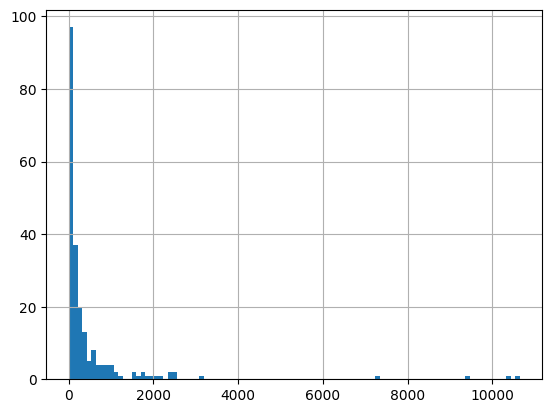

In [20]:
sys_count.hist(bins=100)

In [22]:
sys_count.median()

123.0

In [23]:
sys_count.head(20)

model_fqn
defense-finder-models/RM/RM/RM_Type_IV                           10643
defense-finder-models/RM/RM/RM_Type_I                            10397
defense-finder-models/RM/RM/RM_Type_IIG                           9435
defense-finder-models/RM/RM/RM_Type_II                            7342
defense-finder-models/DefenseFinder_5/SoFIC/SoFic                 3152
defense-finder-models/Cas/Cas/CAS_Class1-Subtype-I-E              2524
defense-finder-models/DefenseFinder_1/Lamassu-Fam/Lamassu-Fam     2475
defense-finder-models/DefenseFinder_1/AbiD/AbiD                   2390
defense-finder-models/RM/RM/RM_Type_III                           2378
defense-finder-models/DefenseFinder_1/Gabija/Gabija               2137
defense-finder-models/DefenseFinder_5/Eleos/Eleos                 2027
defense-finder-models/DefenseFinder_2/Septu/Septu                 1995
defense-finder-models/DefenseFinder_1/AbiE/AbiE                   1838
defense-finder-models/DefenseFinder_5/Borvo/Borvo                 1

In [5]:
pd.set_option('display.max_columns', 50)
defense_finder_genes_genomes

,replicon,protein_accession,gene_name,hit_pos,model_fqn,sys_id,sys_loci,locus_num,sys_wholeness,sys_score,sys_occ,hit_gene_ref,hit_status,hit_seq_len,hit_i_eval,hit_score,hit_profile_cov,hit_seq_cov,hit_begin_match,hit_end_match,counterpart,used_in,genome,seq_id
0,UserReplicon,WP_104808176.1,CBASS__Phospholipase,136,defense-finder-models/DefenseFinder_5/CBASS/CB...,UserReplicon_CBASS_I_3,1,1,1.0,2.0,1,CBASS__Effector_2TM_S_2TMBeta,mandatory,338,6.100000e-90,299.4,0.921,0.982,3,334,None,UserReplicon_CBASS_1,GCF_002943715,509511e1c80ca9d983895d3a6978bfaaae22029103f259...
1,UserReplicon,WP_104808177.1,CBASS__Cyclase_II,137,defense-finder-models/DefenseFinder_5/CBASS/CB...,UserReplicon_CBASS_I_3,1,1,1.0,2.0,1,CBASS__Cyclase_SMODS,mandatory,500,1.200000e-39,134.0,0.876,0.694,12,358,None,UserReplicon_CBASS_1,GCF_002943715,0ac4c3b9a40e0c8d49bd88e69f7ce8a4f394e7e401b2eb...
2,UserReplicon,WP_104809476.1,CBASS__Endonuc_small,1266,defense-finder-models/DefenseFinder_5/CBASS/CB...,UserReplicon_CBASS_I_4,1,1,1.0,2.0,1,CBASS__Effector_2TM_S_2TMBeta,mandatory,278,9.600000e-12,42.7,0.780,0.709,6,202,None,UserReplicon_CBASS_2,GCF_002943715,79d43c4bfdc055ce1fa1dc4f99d8d49f592965d5765c4b...
3,UserReplicon,WP_104809477.1,CBASS__Cyclase_II,1267,defense-finder-models/DefenseFinder_5/CBASS/CB...,UserReplicon_CBASS_I_4,1,1,1.0,2.0,1,CBASS__Cyclase_SMODS,mandatory,328,1.700000e-11,41.5,0.920,0.985,4,326,None,UserReplicon_CBASS_2,GCF_002943715,817c3f75e870ce99cdcdce9cdeb4d3a559bf4cc4c710b5...
4,UserReplicon,WP_104810012.1,SoFic__SoFic,1738,defense-finder-models/DefenseFinder_5/SoFIC/SoFic,UserReplicon_SoFic_5,1,1,1.0,1.0,1,SoFic__SoFic,mandatory,361,2.300000e-114,380.1,0.972,0.961,12,358,None,None,GCF_002943715,017a737124a375f1ce0662310a3202d7a75d5c6d38f0e4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244017,UserReplicon,WP_018971422.1,Eleos__LeoA,160,defense-finder-models/DefenseFinder_5/Eleos/Eleos,UserReplicon_Eleos_1,1,1,0.5,2.0,1,Eleos__LeoA,mandatory,454,2.800000e-17,60.5,0.388,0.478,35,251,None,None,GCF_000378125,b6bfc769aec4184ace05bc47a72445d90a628ac960ec3d...
244018,UserReplicon,WP_018972506.1,RM__Type_I_REases,961,defense-finder-models/RM/RM/RM_Type_I,UserReplicon_RM_Type_I_1,1,1,1.0,2.5,1,RM__Type_I_REases,mandatory,933,1.100000e-178,594.1,0.851,0.995,4,931,None,None,GCF_000378125,9eaee3743a0049d63f83ae6045fc5e3a849bb08dead33c...
244019,UserReplicon,WP_018972507.1,RM__Type_I_S,962,defense-finder-models/RM/RM/RM_Type_I,UserReplicon_RM_Type_I_1,1,1,1.0,2.5,1,RM__Type_I_S,accessory,489,9.700000e-77,256.8,0.547,0.924,34,485,None,None,GCF_000378125,37fd590b0da51f3101c9874eeac0b2ccf2b1ea84c705e1...
244020,UserReplicon,WP_018972510.1,RM__Type_I_MTases,964,defense-finder-models/RM/RM/RM_Type_I,UserReplicon_RM_Type_I_1,1,1,1.0,2.5,1,RM__Type_I_MTases,mandatory,491,2.700000e-207,687.2,0.953,0.988,1,485,None,None,GCF_000378125,e49f47c1254b96f53f124c83520b2c9af8745b3b0d5cad...


In [20]:
caprel_df = defense_finder_genes_genomes[defense_finder_genes_genomes['gene_name'] == 'CapRel__CapRel']
caprel_df.to_csv('../data/external/CapRel_genomes.csv', index=False)
caprel_df['genome'].nunique()


351

In [22]:
cmdtac_df = defense_finder_genes_genomes[defense_finder_genes_genomes['gene_name'].str.contains('PD-T4-9')]
cmdtac_df.to_csv('../data/external/cmdtac_genomes.csv', index=False)
cmdtac_df['genome'].nunique()

109

In [ ]:
defense_finder_genes_genomes[defense_finder_genes_genomes['system'] == 'PD-T4-9']

In [7]:
gene_counts = defense_finder_genes_genomes['gene_name'].value_counts().reset_index(name='count')

In [9]:
gene_counts[gene_counts['gene_name'].str.contains('Cap')]

,gene_name,count
31,Lamassu-Fam__LmuB_SMC_Cap4_nuclease_II,1173
65,Lamassu-Fam__LmuA_effector_Cap4_nuclease_II,704
152,CapRel__CapRel,358
160,Lamassu-Fam__LmuC_acc_Cap4_nuclease,317
207,Lamassu-Fam__LmuB_SMC_Cap4_nuclease,242
217,Lamassu-Fam__LmuA_effector_Cap4_nuclease,224


In [12]:
gene_counts[gene_counts['gene_name'].str.contains('PD-T4-9')]

,gene_name,count
341,PD-T4-9__PD-T4-9_A,111
345,PD-T4-9__PD-T4-9_C,110
857,PD-T4-9__PD-T4-9_B,4
